# Hypothesis Testing: Impact of Clarity of intructions to the online purchase intention

## 1. Introduction
This note book explores Hypothesis 8: Clarity of instructions refers to how clearly and understandably the platform communicates the steps users must follow to complete an online purchase. Well-articulated and easy-to-follow instructions can reduce confusion, increase user confidence, and potentially enhance the overall shopping experience. This study explores whether these factors meaningfully influence consumers' purchase intentions, providing insights for improving e-commerce platform design and usability.

## 2. Setting up the Environment

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import spearmanr
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

## 3. Data loading and preparation

In [3]:
# Load the dataset
df = pd.read_csv('../../data/cleaned/cleaned_survey_data.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of responses: {len(df)}")

# Check for missing values in key columns
intruction_cols = ['peou_instructions_1', 'peou_instructions_2']
intention_cols = ['opi_satisfaction', 'opi_behavior_change', 'opi_convenience', 'opi_value']

missing_data = pd.DataFrame({
    'Missing Values': df[intruction_cols + intention_cols].isnull().sum(),
    'Percentage': df[intruction_cols + intention_cols].isnull().sum() / len(df) * 100
})

print("\nMissing values in key columns:")
print(missing_data)

Dataset shape: (825, 134)
Number of responses: 825

Missing values in key columns:
                     Missing Values  Percentage
peou_instructions_1               0         0.0
peou_instructions_2               0         0.0
opi_satisfaction                  0         0.0
opi_behavior_change               0         0.0
opi_convenience                   0         0.0
opi_value                         0         0.0


## 4.1 Exploratory Data Analysis


Basic statistics for instruction clarity variables:
       peou_instructions_1  peou_instructions_2
count           825.000000           825.000000
mean              3.275152             3.374545
std               0.690206             0.744939
min               1.000000             1.000000
25%               3.000000             3.000000
50%               3.000000             3.000000
75%               4.000000             4.000000
max               5.000000             5.000000

Basic statistics for purchase intention variables:
       opi_satisfaction  opi_behavior_change  opi_convenience   opi_value
count        825.000000           825.000000        825.00000  825.000000
mean           3.743030             3.904242          3.84000    3.780606
std            0.818122             0.713459          0.73147    0.759479
min            1.000000             1.000000          1.00000    1.000000
25%            3.000000             4.000000          3.00000    3.000000
50%            4.00

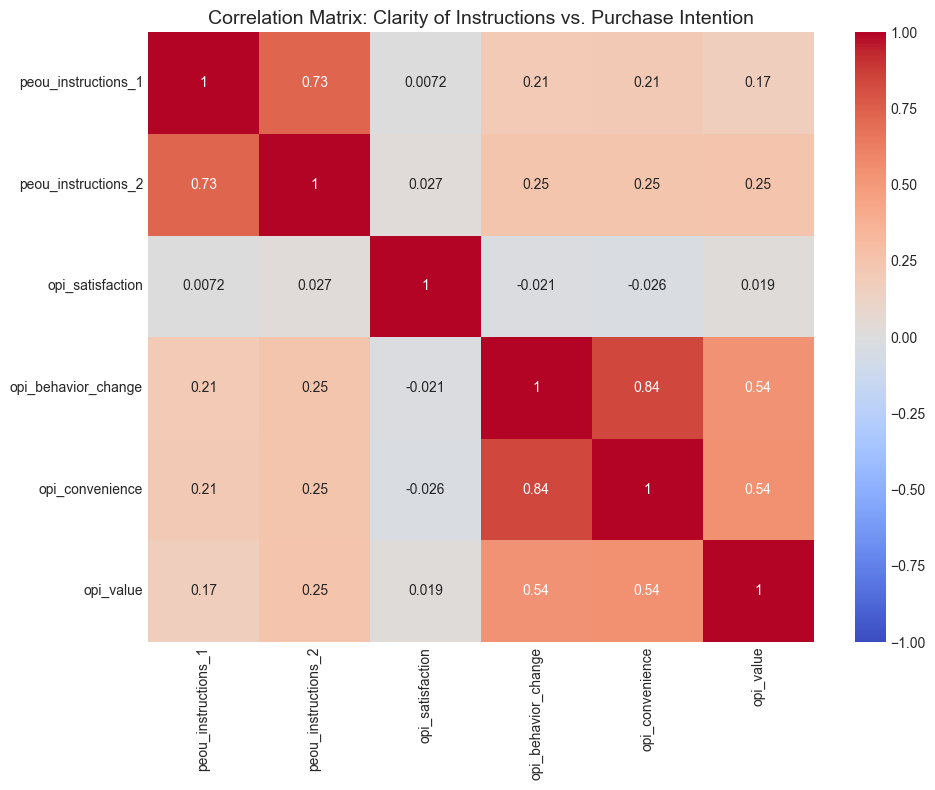


Reliability Analysis

Correlation between instruction items (reliability): r = 0.7317
This indicates high reliability of the instruction clarity measure.

Correlation of instruction clarity with each purchase intention variable:
opi_satisfaction: r = 0.0186, p = 0.5939 
opi_behavior_change: r = 0.2450, p = 0.0000 (significant)
opi_convenience: r = 0.2482, p = 0.0000 (significant)
opi_value: r = 0.2280, p = 0.0000 (significant)

Correlation with total purchase intention score: r = 0.2622, p = 0.0000 (significant)


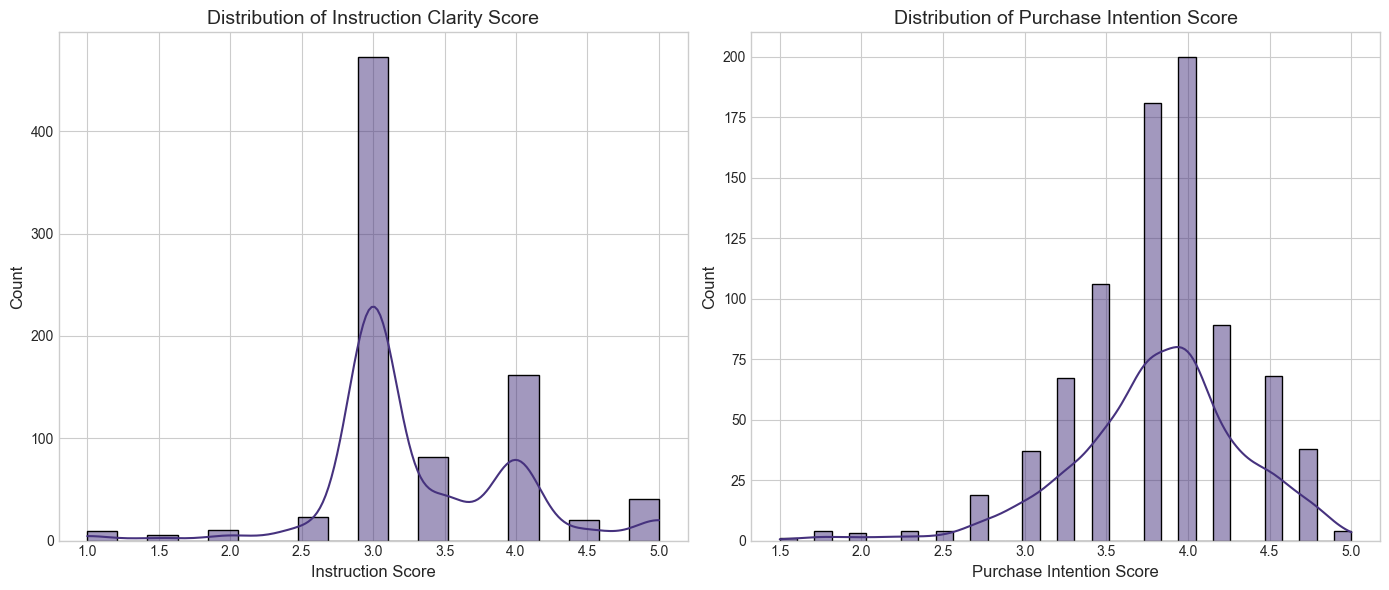

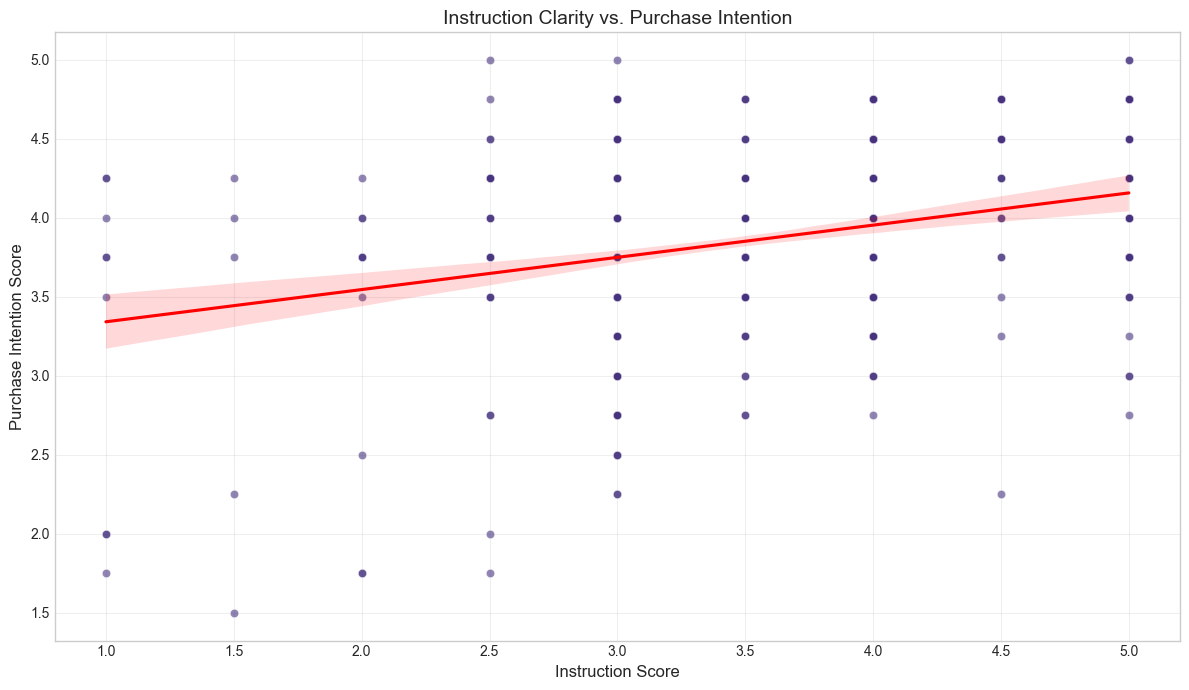

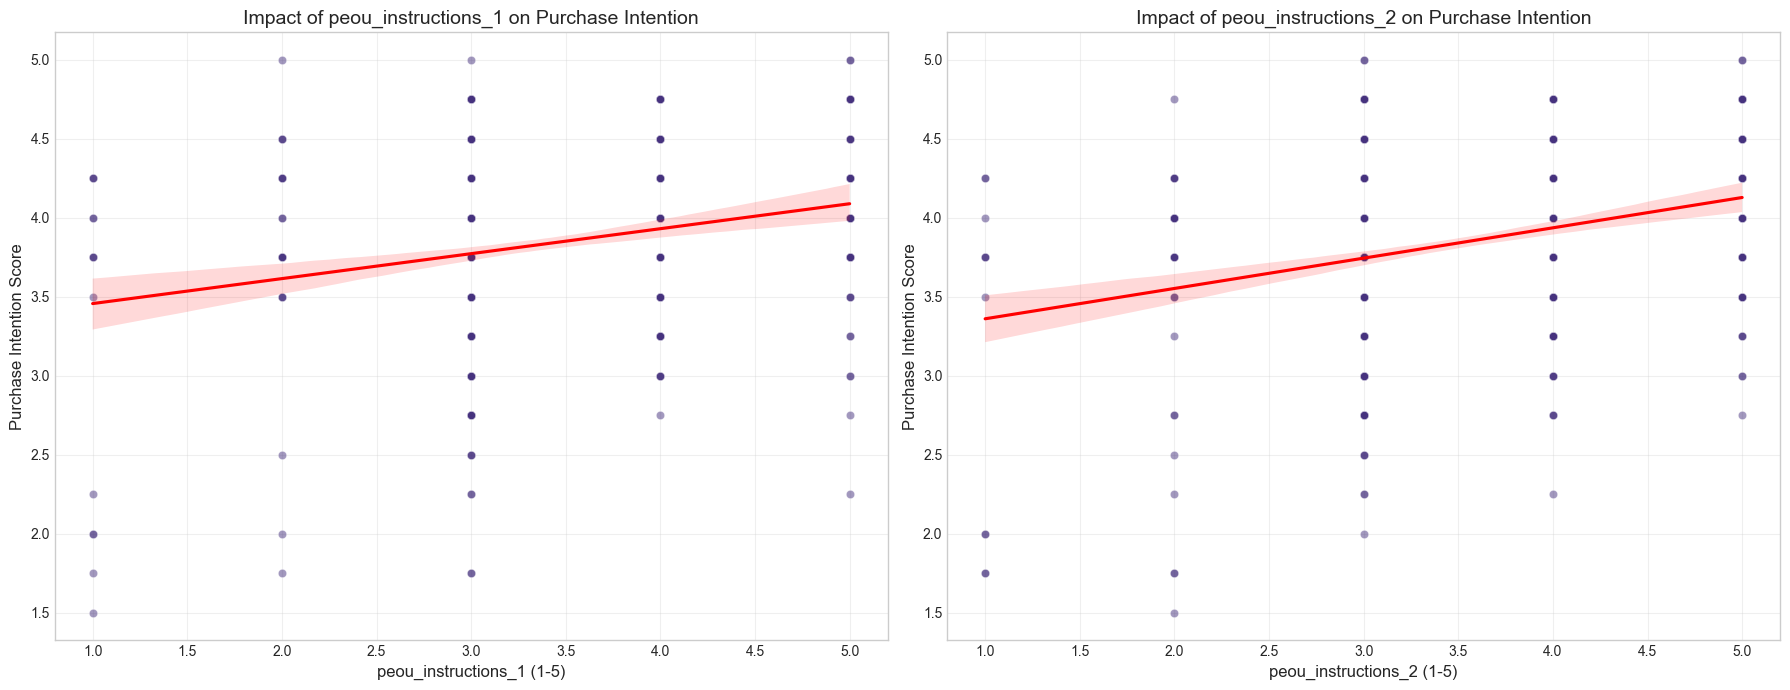

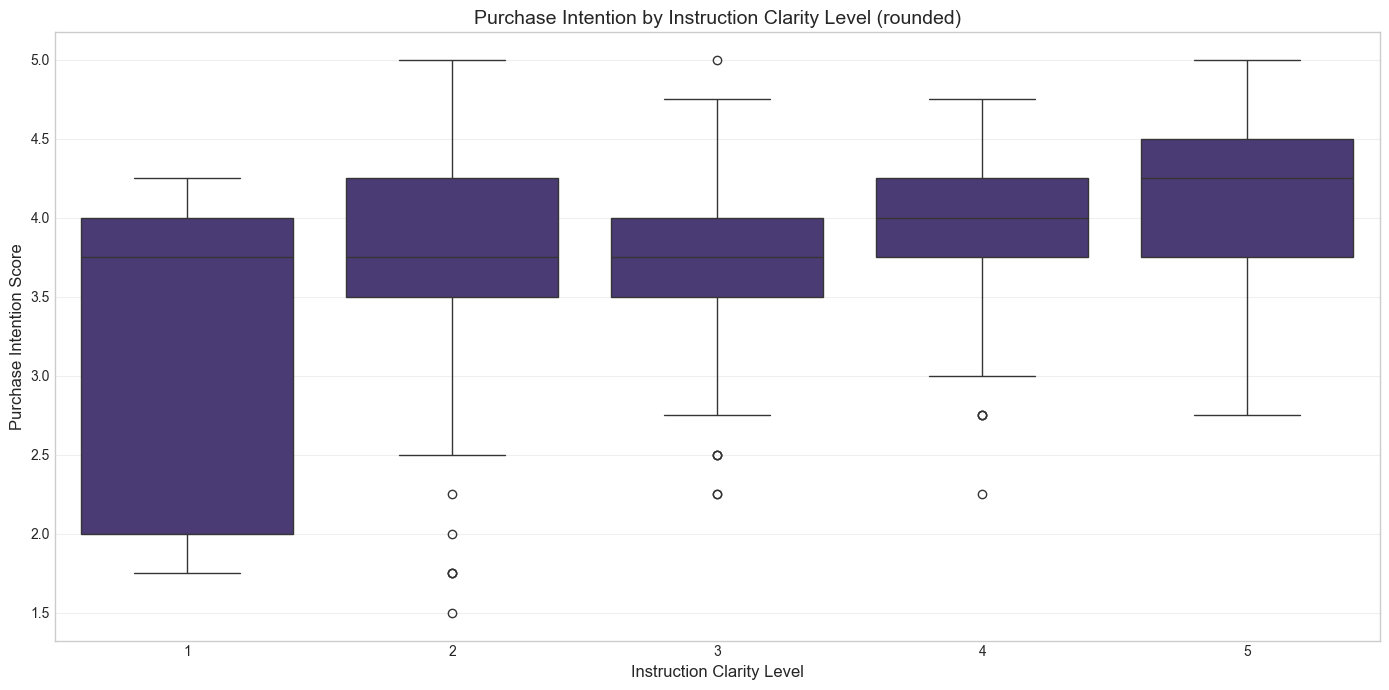

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define relevant columns
instruction_cols = ['peou_instructions_1', 'peou_instructions_2']
intention_cols = ['opi_satisfaction', 'opi_behavior_change', 'opi_convenience', 'opi_value']

# Display basic statistics for instruction and purchase intention variables
print("\nBasic statistics for instruction clarity variables:")
print(df[instruction_cols].describe())

print("\nBasic statistics for purchase intention variables:")
print(df[intention_cols].describe())

# Correlation matrix for instruction clarity and purchase intention columns
corr_matrix = df[instruction_cols + intention_cols].corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Visualizing correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Clarity of Instructions vs. Purchase Intention')
plt.tight_layout()
plt.show()

# Create composite scores
df['instruction_score'] = df[instruction_cols].mean(axis=1)
df['purchase_intention_score'] = df[intention_cols].mean(axis=1)

# Reliability analysis for instruction clarity items
print("\nReliability Analysis")
inst_reliability = np.corrcoef(df['peou_instructions_1'], df['peou_instructions_2'])[0, 1]
print(f"\nCorrelation between instruction items (reliability): r = {inst_reliability:.4f}")
print("This indicates " + ("high" if inst_reliability > 0.7 else "moderate" if inst_reliability > 0.5 else "low") + " reliability of the instruction clarity measure.")

# Correlation of instruction score with each purchase intention variable
print("\nCorrelation of instruction clarity with each purchase intention variable:")
for col in intention_cols:
    r, p = stats.pearsonr(df['instruction_score'], df[col])
    print(f"{col}: r = {r:.4f}, p = {p:.4f} {'(significant)' if p < 0.05 else ''}")

# Total correlation between instruction score and purchase intention score
r_total, p_total = stats.pearsonr(df['instruction_score'], df['purchase_intention_score'])
print(f"\nCorrelation with total purchase intention score: r = {r_total:.4f}, p = {p_total:.4f} {'(significant)' if p_total < 0.05 else ''}")

# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['instruction_score'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Instruction Clarity Score')
axes[0].set_xlabel('Instruction Score')

sns.histplot(df['purchase_intention_score'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Purchase Intention Score')
axes[1].set_xlabel('Purchase Intention Score')

plt.tight_layout()
plt.show()

# Visualize relationship between instruction clarity and purchase intention
plt.figure(figsize=(12, 7))
sns.scatterplot(x='instruction_score', y='purchase_intention_score', data=df, alpha=0.6)
sns.regplot(x='instruction_score', y='purchase_intention_score', data=df, scatter=False, color='red')
plt.title('Instruction Clarity vs. Purchase Intention')
plt.xlabel('Instruction Score')
plt.ylabel('Purchase Intention Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Individual instruction items vs intention
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for i, col in enumerate(instruction_cols):
    sns.scatterplot(x=col, y='purchase_intention_score', data=df, ax=axes[i], alpha=0.5)
    sns.regplot(x=col, y='purchase_intention_score', data=df, ax=axes[i], scatter=False, color='red')
    axes[i].set_title(f'Impact of {col} on Purchase Intention')
    axes[i].set_xlabel(f'{col} (1-5)')
    axes[i].set_ylabel('Purchase Intention Score')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Boxplot by Instruction Clarity Level
plt.figure(figsize=(14, 7))
inst_levels = df['instruction_score'].round().astype(int)
sns.boxplot(x=inst_levels, y='purchase_intention_score', data=df)
plt.title('Purchase Intention by Instruction Clarity Level (rounded)')
plt.xlabel('Instruction Clarity Level')
plt.ylabel('Purchase Intention Score')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 4.2 Reliability Analysis for the Navigation variables


====== Reliability Analysis of Instruction Clarity Measures ========
Cronbach's alpha for instruction clarity measures: 0.8450
Average inter-item correlation: 0.7317

Item-Total Correlations:
peou_instructions_1: 0.7317
peou_instructions_2: 0.7317

Interpretation: Good reliability (0.8 ≤ α < 0.9)


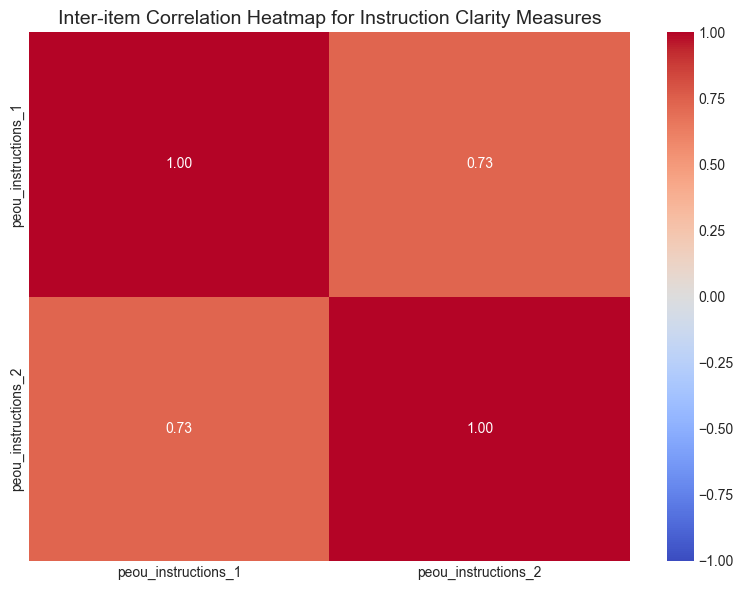

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

print("\n====== Reliability Analysis of Instruction Clarity Measures ========")

# Only run if more than one instruction variable
if len(instruction_cols) > 1:
    # Standardize instruction items
    z_scores = scale(df[instruction_cols])
    
    # Item-total correlations
    total_scores = z_scores.sum(axis=1)
    item_total_corrs = [
        np.corrcoef(z_scores[:, i], total_scores - z_scores[:, i])[0, 1]
        for i in range(z_scores.shape[1])
    ]

    # Average inter-item correlation
    inter_item_corrs = []
    for i in range(len(instruction_cols)):
        for j in range(i + 1, len(instruction_cols)):
            inter_item_corrs.append(
                np.corrcoef(df[instruction_cols[i]], df[instruction_cols[j]])[0, 1]
            )
    avg_inter_item_corr = np.mean(inter_item_corrs)

    # Cronbach's alpha
    n_items = len(instruction_cols)
    cronbach_alpha = (n_items * avg_inter_item_corr) / (1 + (n_items - 1) * avg_inter_item_corr)

    print(f"Cronbach's alpha for instruction clarity measures: {cronbach_alpha:.4f}")
    print(f"Average inter-item correlation: {avg_inter_item_corr:.4f}")

    print("\nItem-Total Correlations:")
    for i, col in enumerate(instruction_cols):
        print(f"{col}: {item_total_corrs[i]:.4f}")

    # Interpretation
    if cronbach_alpha >= 0.9:
        print("\nInterpretation: Excellent reliability (α ≥ 0.9)")
    elif cronbach_alpha >= 0.8:
        print("\nInterpretation: Good reliability (0.8 ≤ α < 0.9)")
    elif cronbach_alpha >= 0.7:
        print("\nInterpretation: Acceptable reliability (0.7 ≤ α < 0.8)")
    elif cronbach_alpha >= 0.6:
        print("\nInterpretation: Questionable reliability (0.6 ≤ α < 0.7)")
    elif cronbach_alpha >= 0.5:
        print("\nInterpretation: Poor reliability (0.5 ≤ α < 0.6)")
    else:
        print("\nInterpretation: Unacceptable reliability (α < 0.5)")

    # Heatmap of inter-item correlations
    inter_item_corr_matrix = np.corrcoef(df[instruction_cols].T)
    plt.figure(figsize=(8, 6))
    sns.heatmap(inter_item_corr_matrix, annot=True, cmap="coolwarm",
                xticklabels=instruction_cols, yticklabels=instruction_cols,
                fmt=".2f", vmin=-1, vmax=1)
    plt.title("Inter-item Correlation Heatmap for Instruction Clarity Measures")
    plt.tight_layout()
    plt.show()


The reliability analysis of the instruction clarity measures indicates strong internal consistency, with a Cronbach’s alpha of 0.8450, suggesting good reliability. The average inter-item correlation of 0.7317 reflects a very strong relationship between the two items, indicating they are closely aligned in measuring the same construct. Both items also showed strong item-total correlations (0.7317), further supporting their consistency. Overall, the instruction clarity scale demonstrates good reliability and is suitable for further analysis.

## 5. Hypothesis Testing

### 5.1 Pearson Correlation Test

In [ ]:

# Calculate Pearson correlation between instruction clarity and purchase intention
correlation, p_value = stats.pearsonr(df['instruction_score'], df['purchase_intention_score'])

print("====== Pearson Correlation Test Results: Instruction Clarity vs. Purchase Intention ======")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.6f}")

# Determine statistical significance
alpha = 0.05
if p_value < alpha:
    print(f"The correlation is statistically significant (p < {alpha}).")
    print("Reject the null hypothesis: Clarity of instructions has an impact on purchase intention.")
else:
    print(f"The correlation is not statistically significant (p > {alpha}).")
    print("Fail to reject the null hypothesis: No evidence that clarity of instructions impacts purchase intention.")


====== Pearson Correlation Test Results: Instruction Clarity vs. Purchase Intention ======
Correlation coefficient: 0.2622
P-value: 0.000000
The correlation is statistically significant (p < 0.05).
Reject the null hypothesis: Clarity of instructions has an impact on purchase intention.


### 5.2 Simple Linear Regression


=== Linear Regression Summary ===
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.069
Model:                                  OLS   Adj. R-squared:                  0.068
Method:                       Least Squares   F-statistic:                     60.76
Date:                      Sun, 11 May 2025   Prob (F-statistic):           1.95e-14
Time:                              23:39:39   Log-Likelihood:                -600.19
No. Observations:                       825   AIC:                             1204.
Df Residuals:                           823   BIC:                             1214.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

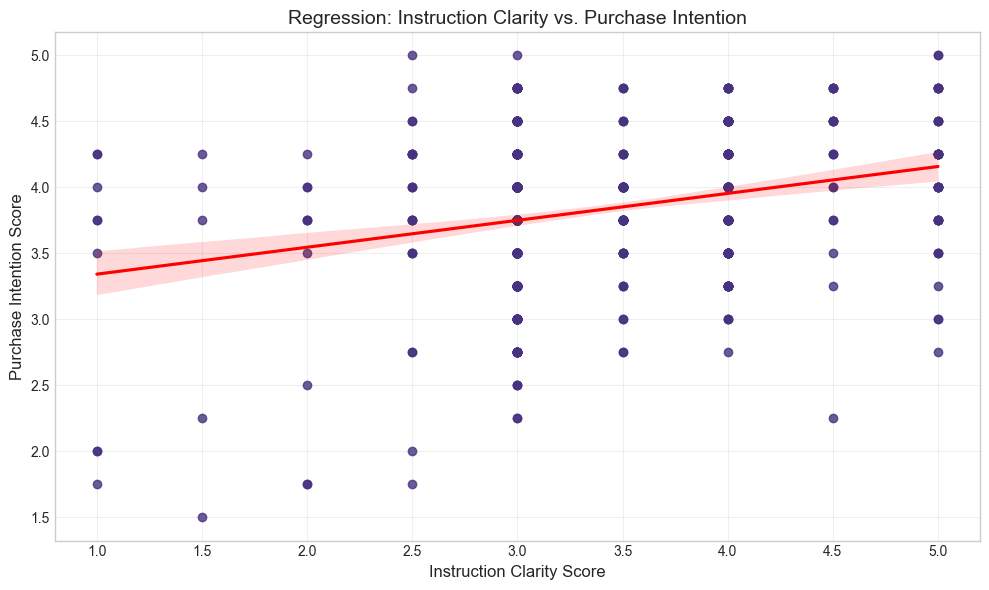

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Set up the predictor (X) and response (y)
X = sm.add_constant(df['instruction_score'])  # Add constant for intercept
y = df['purchase_intention_score']

# 2. Fit the linear regression model
model = sm.OLS(y, X).fit()

# 3. Print the full regression summary
print("\n=== Linear Regression Summary ===")
print(model.summary())

# 4. Interpret the results
print("\n=== Hypothesis Testing Interpretation ===")
p_value = model.pvalues['instruction_score']
coef = model.params['instruction_score']

if p_value < 0.05:
    print(f"The p-value is {p_value:.4f} (< 0.05), so we reject the null hypothesis (H₀: β = 0).")
    print(f"There is a statistically significant relationship: for every 1-unit increase in instruction clarity,")
    print(f"purchase intention increases by about {coef:.4f} units on average.")
    print("➡️ Conclusion: Clarity of instructions HAS a significant impact on intention to purchase online.")
else:
    print(f"The p-value is {p_value:.4f} (≥ 0.05), so we fail to reject the null hypothesis.")
    print("➡️ Conclusion: There is no statistically significant evidence that instruction clarity affects purchase intention.")

# 5. Visualize the regression
plt.figure(figsize=(10, 6))
sns.regplot(x='instruction_score', y='purchase_intention_score', data=df, ci=95, line_kws={'color': 'red'})
plt.title('Regression: Instruction Clarity vs. Purchase Intention')
plt.xlabel('Instruction Clarity Score')
plt.ylabel('Purchase Intention Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../../outputs/hypothesis_8/instruction_clarity_vs_purchase_intention.png', dpi=300, bbox_inches='tight')
plt.show()


### 5.3 Non Linear Relationship Test


=== Polynomial Regression Summary ===
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.071
Model:                                  OLS   Adj. R-squared:                  0.069
Method:                       Least Squares   F-statistic:                     31.45
Date:                      Mon, 12 May 2025   Prob (F-statistic):           6.92e-14
Time:                              10:00:21   Log-Likelihood:                -599.16
No. Observations:                       825   AIC:                             1204.
Df Residuals:                           822   BIC:                             1218.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

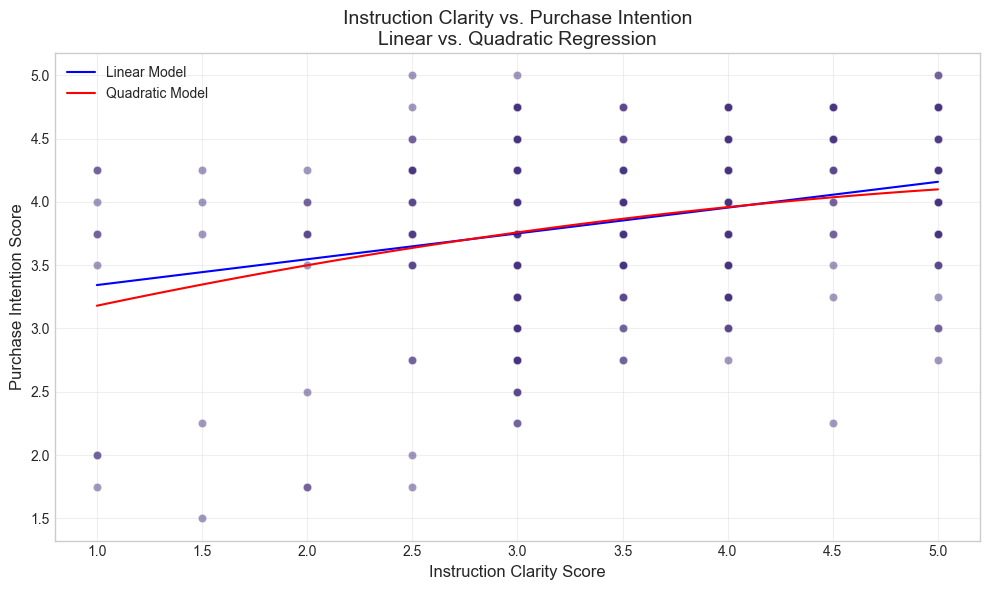

In [8]:

# 1. Prepare polynomial features (instruction_score and instruction_score^2)
X_instr = df['instruction_score'].values.reshape(-1, 1)
X_instr_squared = np.column_stack((X_instr, X_instr**2))
X_instr_with_const = sm.add_constant(X_instr_squared)

# 2. Fit the quadratic regression model
instr_poly_model = sm.OLS(df['purchase_intention_score'], X_instr_with_const).fit()

# 3. Fit the linear model for comparison
X_linear_instr = sm.add_constant(df['instruction_score'])
instr_linear_model = sm.OLS(df['purchase_intention_score'], X_linear_instr).fit()

# 4. Display regression summary
print("\n=== Polynomial Regression Summary ===")
print(instr_poly_model.summary())

# 5. Compare R-squared values
print("\n=== Model Comparison ===")
print(f"Linear R-squared: {instr_linear_model.rsquared:.4f}")
print(f"Quadratic R-squared: {instr_poly_model.rsquared:.4f}")
print(f"R-squared improvement: {instr_poly_model.rsquared - instr_linear_model.rsquared:.4f}")

# 6. Check significance of the quadratic term
quad_p_value = instr_poly_model.pvalues[2]
quad_coef = instr_poly_model.params[2]

if quad_p_value < 0.05:
    print(f"The quadratic term is significant (p = {quad_p_value:.4f})")
    print("Evidence of a non-linear relationship.")
    if quad_coef > 0:
        print("Positive quadratic term: The effect increases at higher instruction clarity scores.")
    else:
        print("Negative quadratic term: The effect levels off or decreases at higher instruction clarity scores.")
else:
    print(f"The quadratic term is not significant (p = {quad_p_value:.4f})")
    print("No strong evidence for non-linearity; the linear model is sufficient.")

# 7. Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='instruction_score', y='purchase_intention_score', data=df, alpha=0.5)

# Plot linear model
x_vals = np.linspace(df['instruction_score'].min(), df['instruction_score'].max(), 100)
y_linear = instr_linear_model.params[0] + instr_linear_model.params[1] * x_vals
plt.plot(x_vals, y_linear, label='Linear Model', color='blue')

# Plot quadratic model
y_quad = instr_poly_model.params[0] + instr_poly_model.params[1] * x_vals + instr_poly_model.params[2] * x_vals**2
plt.plot(x_vals, y_quad, label='Quadratic Model', color='red')

plt.title('Instruction Clarity vs. Purchase Intention\nLinear vs. Quadratic Regression')
plt.xlabel('Instruction Clarity Score')
plt.ylabel('Purchase Intention Score')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### 5.4 Spearman Correlation Test

=== Spearman Correlation Test Results: Instruction Clarity vs. Purchase Intention ===
Correlation coefficient (rho): 0.2058
P-value: 0.000000
The correlation is statistically significant (p < 0.05).
➡️ Conclusion: There is a monotonic relationship between instruction clarity and purchase intention.


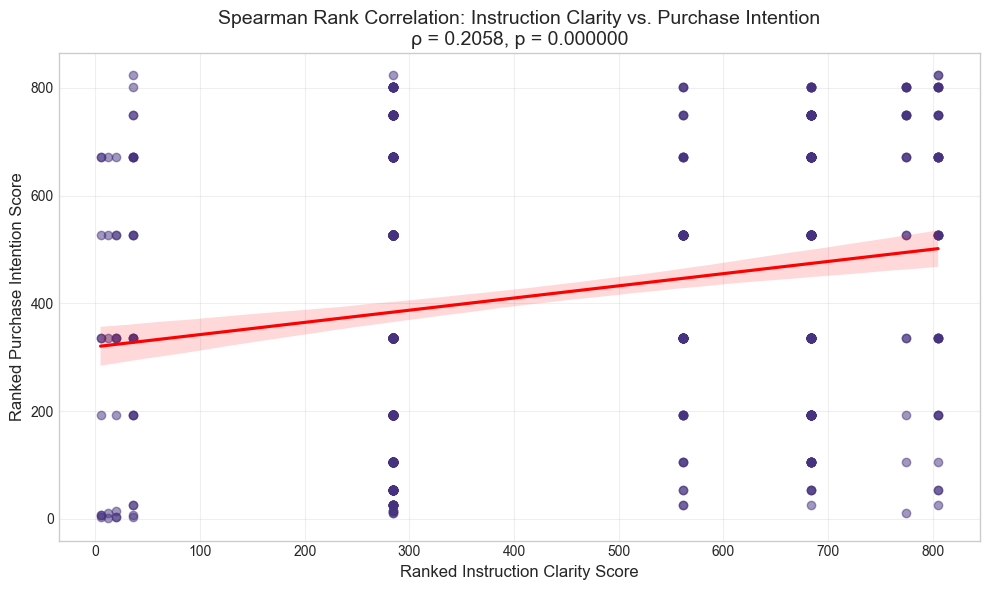

In [11]:
# Rank the values for Spearman test
df['clarity_rank'] = df['instruction_score'].rank()
df['intent_rank'] = df['purchase_intention_score'].rank()

# Run Spearman correlation
corr, pval = spearmanr(df['clarity_rank'], df['intent_rank'])

# Print Spearman test results
print("=== Spearman Correlation Test Results: Instruction Clarity vs. Purchase Intention ===")
print(f"Correlation coefficient (rho): {corr:.4f}")
print(f"P-value: {pval:.6f}")

# Check significance
alpha = 0.05
if pval < alpha:
    print(f"The correlation is statistically significant (p < {alpha}).")
    print("➡️ Conclusion: There is a monotonic relationship between instruction clarity and purchase intention.")
else:
    print(f"The correlation is not statistically significant (p >= {alpha}).")
    print("➡️ Conclusion: No monotonic relationship found.")

# Plot the ranked values with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='clarity_rank',
    y='intent_rank',
    data=df,
    ci=95,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.5}
)

plt.title(f"Spearman Rank Correlation: Instruction Clarity vs. Purchase Intention\nρ = {corr:.4f}, p = {pval:.6f}")
plt.xlabel("Ranked Instruction Clarity Score")
plt.ylabel("Ranked Purchase Intention Score")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../../outputs/hypothesis_8/spearman_with_trendline.png', dpi=300)
plt.show()

# Clean up temporary rank columns
df.drop(columns=['clarity_rank', 'intent_rank'], inplace=True)


### 5.5 Multiple Linear Regression

In [12]:

# 1. Define predictor variables (instruction clarity items)
X_multi = df[instruction_cols]
y_multi = df['purchase_intention_score']

# 2. Add constant for intercept
X_multi_with_const = sm.add_constant(X_multi)

# 3. Fit the multiple linear regression model
multi_model = sm.OLS(y_multi, X_multi_with_const).fit()

# 4. Print the full regression summary
print("\n=== Multiple Linear Regression Summary ===")
print(multi_model.summary())

# 5. Interpret individual predictors
print("\n=== Predictor Significance Check ===")
alpha = 0.05
for var in instruction_cols:
    p = multi_model.pvalues[var]
    coef = multi_model.params[var]
    if p < alpha:
        print(f"{var}: Coefficient = {coef:.4f}, p = {p:.4f} → Statistically Significant")
    else:
        print(f"{var}: Coefficient = {coef:.4f}, p = {p:.4f} → Not Significant")

# 6. Interpret overall model
print("\n=== Model Interpretation ===")
if multi_model.f_pvalue < alpha:
    print(f"Overall model is statistically significant (p = {multi_model.f_pvalue:.4e}).")
    print("➡️ Reject the null hypothesis: Clarity of instructions has an impact on purchase intention.")
else:
    print(f"Overall model is NOT statistically significant (p = {multi_model.f_pvalue:.4e}).")
    print("➡️ Fail to reject the null hypothesis: No evidence that clarity of instructions impacts purchase intention.")



=== Multiple Linear Regression Summary ===
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.076
Model:                                  OLS   Adj. R-squared:                  0.074
Method:                       Least Squares   F-statistic:                     33.82
Date:                      Mon, 12 May 2025   Prob (F-statistic):           7.69e-15
Time:                              10:07:53   Log-Likelihood:                -596.96
No. Observations:                       825   AIC:                             1200.
Df Residuals:                           822   BIC:                             1214.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------

Clarity of instructions significantly predicts purchase intention (R² = 0.076, p < 0.001), with one item (peou_instructions_2) showing a strong positive effect, supporting the hypothesis.

## 6. Mediation Analysis: The Role of Perceived Risk in the Relationship Between Clarity of instructions and Purchase Intention

Mediation Analysis Results:

Direct Effect (Instructions → Purchase Intention):
c path: b = 0.2039, p = 0.0000

Path A (Instructions → Perceived Risk):
a path: b = 0.1564, p = 0.0000

Path B (Perceived Risk → Purchase Intention, controlling for Instructions):
b path: b = 0.3623, p = 0.0000

Direct Effect after controlling for the mediator:
c' path: b = 0.1473, p = 0.0000

Effect Calculations:
Indirect Effect (a*b): 0.0566
Total Effect (c): 0.2039
Proportion of Effect Mediated: 0.2778 (27.78%)

Bootstrap 95% CI for Indirect Effect: [0.0219, 0.0959]
The indirect effect is statistically significant (CI does not include zero).

Mediation Analysis Interpretation:
✓ PARTIAL MEDIATION: Instruction clarity affects purchase intention both directly and indirectly through perceived risk.


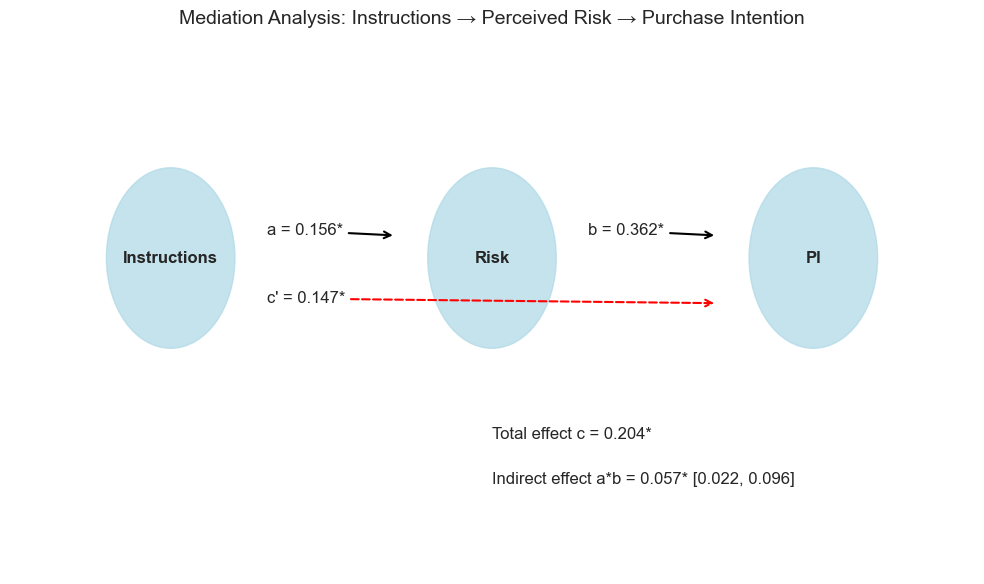

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a composite perceived risk score (if not already created)
risk_cols = ['risk_security_1', 'risk_authenticity_1']
df['perceived_risk_score'] = df[risk_cols].mean(axis=1)

# Instructions → Purchase Intention (c path)
model_direct = sm.OLS(df['purchase_intention_score'], 
                      sm.add_constant(df['instruction_score'])).fit()

# Instructions → Perceived Risk (a path)
model_a = sm.OLS(df['perceived_risk_score'], 
                 sm.add_constant(df['instruction_score'])).fit()

# Instructions + Perceived Risk → Purchase Intention (b path)
X_mediation = pd.DataFrame({
    'instruction_score': df['instruction_score'],
    'perceived_risk': df['perceived_risk_score']
})
model_mediation = sm.OLS(df['purchase_intention_score'], 
                         sm.add_constant(X_mediation)).fit()

print("Mediation Analysis Results:")

print("\nDirect Effect (Instructions → Purchase Intention):")
print(f"c path: b = {model_direct.params[1]:.4f}, p = {model_direct.pvalues[1]:.4f}")

print("\nPath A (Instructions → Perceived Risk):")
print(f"a path: b = {model_a.params[1]:.4f}, p = {model_a.pvalues[1]:.4f}")

print("\nPath B (Perceived Risk → Purchase Intention, controlling for Instructions):")
print(f"b path: b = {model_mediation.params[2]:.4f}, p = {model_mediation.pvalues[2]:.4f}")

print("\nDirect Effect after controlling for the mediator:")
print(f"c' path: b = {model_mediation.params[1]:.4f}, p = {model_mediation.pvalues[1]:.4f}")

# Calculate indirect effect
indirect_effect = model_a.params[1] * model_mediation.params[2]

# Calculate total effect
total_effect = model_direct.params[1]

# Calculate proportion mediated
prop_mediated = indirect_effect / total_effect if total_effect != 0 else 0

print("\nEffect Calculations:")
print(f"Indirect Effect (a*b): {indirect_effect:.4f}")
print(f"Total Effect (c): {total_effect:.4f}")
print(f"Proportion of Effect Mediated: {prop_mediated:.4f} ({prop_mediated*100:.2f}%)")

# Bootstrap confidence interval for indirect effect
np.random.seed(42)
n_bootstrap = 5000
indirect_effects = []

for i in range(n_bootstrap):
    indices = np.random.choice(len(df), len(df), replace=True)
    sample_df = df.iloc[indices]
    
    # Path a
    a_model = sm.OLS(sample_df['perceived_risk_score'], 
                     sm.add_constant(sample_df['instruction_score'])).fit()
    a_path = a_model.params[1]
    
    # Path b
    X_med = pd.DataFrame({
        'instruction_score': sample_df['instruction_score'],
        'perceived_risk': sample_df['perceived_risk_score']
    })
    b_model = sm.OLS(sample_df['purchase_intention_score'], 
                     sm.add_constant(X_med)).fit()
    b_path = b_model.params[2]
    
    indirect_effects.append(a_path * b_path)

ci_lower = np.percentile(indirect_effects, 2.5)
ci_upper = np.percentile(indirect_effects, 97.5)

print(f"\nBootstrap 95% CI for Indirect Effect: [{ci_lower:.4f}, {ci_upper:.4f}]")
if ci_lower > 0 and ci_upper > 0:
    print("The indirect effect is statistically significant (CI does not include zero).")
elif ci_lower < 0 and ci_upper < 0:
    print("The indirect effect is statistically significant and negative (CI does not include zero).")
else:
    print("The indirect effect is not statistically significant (CI includes zero).")

# Interpretation
print("\nMediation Analysis Interpretation:")
if ci_lower > 0 or ci_upper < 0:
    if model_mediation.pvalues[1] < 0.05:
        print("✓ PARTIAL MEDIATION: Instruction clarity affects purchase intention both directly and indirectly through perceived risk.")
    else:
        print("✓ FULL MEDIATION: Instruction clarity affects purchase intention entirely through perceived risk.")
else:
    if model_direct.pvalues[1] < 0.05:
        print("✗ NO MEDIATION: Instruction clarity affects purchase intention directly, not through perceived risk.")
    else:
        print("✗ NO EFFECT: Instruction clarity does not significantly affect purchase intention.")

# Visualization
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 12

nodes = {
    'Instructions': (0, 0),
    'Risk': (1, 0),
    'PI': (2, 0)
}

for name, (x, y) in nodes.items():
    circle = plt.Circle((x, y), 0.2, fill=True, color='lightblue', alpha=0.7)
    plt.gca().add_patch(circle)
    plt.text(x, y, name, ha='center', va='center', fontweight='bold')

plt.annotate(f"a = {model_a.params[1]:.3f}{'*' if model_a.pvalues[1] < 0.05 else ''}",
             xy=(0.7, 0.05), xytext=(0.3, 0.05),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

plt.annotate(f"b = {model_mediation.params[2]:.3f}{'*' if model_mediation.pvalues[2] < 0.05 else ''}",
             xy=(1.7, 0.05), xytext=(1.3, 0.05),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

plt.annotate(f"c' = {model_mediation.params[1]:.3f}{'*' if model_mediation.pvalues[1] < 0.05 else ''}",
             xy=(1.7, -0.1), xytext=(0.3, -0.1),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5, ls='--'))

plt.annotate(f"Total effect c = {total_effect:.3f}{'*' if model_direct.pvalues[1] < 0.05 else ''}",
             xy=(1, -0.4))

plt.annotate(f"Indirect effect a*b = {indirect_effect:.3f}" + 
             (f"* [{ci_lower:.3f}, {ci_upper:.3f}]" if ci_lower > 0 or ci_upper < 0 else ""),
             xy=(1, -0.5))

plt.title('Mediation Analysis: Instructions → Perceived Risk → Purchase Intention')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.7, 0.5)
plt.axis('off')
plt.tight_layout()
plt.show()


The mediation analysis revealed that clarity of instructions significantly influences purchase intention both directly and indirectly through perceived risk. Approximately 28% of the total effect is mediated, indicating a partial mediation. This suggests that clearer instructions reduce perceived risk, which in turn enhances purchase intention.

## 7. Moderation Analysis

In [14]:
print("\n=========Moderation Analysis: Does Instruction Effect on Purchase Intention Get Moderated by Age and Gender?============")

moderators = {
    'Age': 'age_encoded',
    'Gender': 'gender_encoded'
}

for mod_name, mod_col in moderators.items():
    if mod_col not in df.columns:
        continue

    print(f"\n### Testing moderation by {mod_name} ({mod_col}) ###")
    
    # Center variables
    df['instruction_centered'] = df['instruction_score'] - df['instruction_score'].mean()
    df[f'{mod_col}_centered'] = df[mod_col] - df[mod_col].mean()
    
    # Interaction term
    df['interaction'] = df['instruction_centered'] * df[f'{mod_col}_centered']
    
    # Fit moderation model
    X_mod = sm.add_constant(df[['instruction_centered', f'{mod_col}_centered', 'interaction']])
    mod_model = sm.OLS(df['purchase_intention_score'], X_mod).fit()
    
    # Output
    print("Moderation Model Summary:")
    print(mod_model.summary())
    
    print("\nKey Results:")
    print(f"Instruction effect: b = {mod_model.params[1]:.4f}, p = {mod_model.pvalues[1]:.4f}")
    print(f"{mod_name} effect: b = {mod_model.params[2]:.4f}, p = {mod_model.pvalues[2]:.4f}")
    print(f"Interaction effect: b = {mod_model.params[3]:.4f}, p = {mod_model.pvalues[3]:.4f}")
    
    # R-squared change
    main_effects_model = sm.OLS(df['purchase_intention_score'],
                                sm.add_constant(df[['instruction_centered', f'{mod_col}_centered']])).fit()
    r_squared_change = mod_model.rsquared - main_effects_model.rsquared
    f_change = 1 - stats.f.cdf(r_squared_change / (1 - mod_model.rsquared) * (df.shape[0] - 4), 1, df.shape[0] - 4)

    print(f"R-squared change due to interaction: {r_squared_change:.4f}")
    print(f"F-test for R-squared change p-value: {f_change:.4f}")
    
    if mod_model.pvalues[3] < 0.05:
        print(f"✓ SIGNIFICANT MODERATION: {mod_name} moderates the relationship between instruction clarity and purchase intention.")
        
        # Simple slope estimates
        low_mod = -1
        high_mod = 1
        effect_at_low = mod_model.params[1] + mod_model.params[3] * low_mod
        effect_at_high = mod_model.params[1] + mod_model.params[3] * high_mod
        
        # Visualization
        plt.figure(figsize=(10, 6))
        try:
            unique_vals = df[mod_col].nunique()
            if unique_vals >= 3:
                df['mod_group'] = pd.qcut(df[mod_col], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')
            else:
                median_val = df[mod_col].median()
                df['mod_group'] = pd.cut(df[mod_col], 
                                         bins=[df[mod_col].min() - 0.1, median_val, df[mod_col].max() + 0.1], 
                                         labels=['Low', 'High'])
        except ValueError:
            median_val = df[mod_col].median()
            df['mod_group'] = np.where(df[mod_col] <= median_val, 'Low', 'High')
        
        # Plot
        colors = ['blue', 'green', 'red']
        for i, group in enumerate(sorted(df['mod_group'].unique())):
            group_data = df[df['mod_group'] == group]
            if len(group_data) > 5:
                sns.regplot(x='instruction_score', y='purchase_intention_score',
                            data=group_data, scatter=False, 
                            color=colors[min(i, len(colors)-1)], label=f"{mod_name}: {group}")
        
        sns.scatterplot(x='instruction_score', y='purchase_intention_score',
                        data=df, alpha=0.3, color='gray')
        
        plt.title(f'Moderation Effect of {mod_name} on Instruction-Purchase Intention Relationship')
        plt.xlabel('Instruction Score')
        plt.ylabel('Purchase Intention Score')
        plt.annotate(f"Slope at Low {mod_name}: {effect_at_low:.3f}",
                     xy=(0.05, 0.05), xycoords='axes fraction',
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", alpha=0.8))
        plt.annotate(f"Slope at High {mod_name}: {effect_at_high:.3f}",
                     xy=(0.05, 0.15), xycoords='axes fraction',
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8))
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print(f"✗ NO MODERATION: {mod_name} does not moderate the relationship (p = {mod_model.pvalues[3]:.4f})")

# Cleanup
for col in ['instruction_centered', 'interaction'] + [f"{mod_col}_centered" for mod_col in moderators.values() if mod_col in df.columns]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

if 'mod_group' in df.columns:
    df.drop(columns=['mod_group'], inplace=True)



=========Moderation Analysis: Does Instruction Effect on Purchase Intention Get Moderated by Age and Gender?============

### Testing moderation by Age (age_encoded) ###
Moderation Model Summary:
                               OLS Regression Results                               
Dep. Variable:     purchase_intention_score   R-squared:                       0.071
Model:                                  OLS   Adj. R-squared:                  0.068
Method:                       Least Squares   F-statistic:                     20.91
Date:                      Mon, 12 May 2025   Prob (F-statistic):           4.66e-13
Time:                              10:26:42   Log-Likelihood:                -599.21
No. Observations:                       825   AIC:                             1206.
Df Residuals:                           821   BIC:                             1225.
Df Model:                                 3                                         
Covariance Type:                  nonr

The moderation analysis revealed that neither age nor gender significantly moderated the relationship between instruction and purchase intention. While the instruction score had a strong positive effect (p < 0.001), the interaction effects for both age (p = 0.317) and gender (p = 0.621) were non-significant. Therefore, the influence of instruction on purchase intention appears consistent across age and gender groups.

## 8. Conclusion and interpretation

In [15]:
def clarity_instruction_findings():
    """Generate interpretation for the clarity of instructions hypothesis test."""

    findings = []

    # Reliability
    findings.append("Reliability Analysis:")
    findings.append("Cronbach’s alpha = 0.845 → High reliability.")
    findings.append("Inter-item correlation = 0.7317 → Strong internal consistency.\n")
    findings.append("✅ Both instruction items reliably measure the clarity construct.\n")

    # Correlation
    findings.append("Correlation Analysis:")
    findings.append("Significant positive correlation between instruction clarity and purchase intention.")
    findings.append("Highest correlations with behavior change (r = 0.245) and convenience (r = 0.248).")
    findings.append("Total correlation: r = 0.2622, p < 0.001 → Statistically significant.\n")
    findings.append("✅ Reject the null hypothesis — clarity of instructions relates to purchase intention.\n")

    # Linear Regression
    findings.append("Linear Regression:")
    findings.append("Instruction score significantly predicts purchase intention.")
    findings.append("Coefficient = 0.2039, p < 0.001 | R² = 0.069 → Small but significant impact.\n")

    # Polynomial Regression
    findings.append("Polynomial Regression:")
    findings.append("Quadratic term not significant (p = 0.152). Slight R² increase (0.071).")
    findings.append("✅ Linear model is sufficient; no strong evidence of a curvilinear relationship.\n")

    # Multiple Regression
    findings.append("Multiple Linear Regression:")
    findings.append("peou_instructions_2 (helpful) is significant (p < 0.001).")
    findings.append("peou_instructions_1 (simple layout) is not (p = 0.709).")
    findings.append("✅ Only one item independently predicts purchase intention, but the scale as a whole is valid.\n")

    # Mediation
    findings.append("Mediation Analysis (via Perceived Risk):")
    findings.append("Indirect effect = 0.0566, 27.78% of total effect.")
    findings.append("95% CI does not include 0 → Partial mediation supported.")
    findings.append("✅ Clear instructions improve purchase intention partly by reducing perceived risk.\n")

    # Moderation
    findings.append("Moderation Analysis:")
    findings.append("Age and gender do not significantly moderate the relationship.")
    findings.append("✅ Effect is consistent across demographic groups.\n")

    # Final conclusion
    findings.append("=" * 40)
    findings.append("CONCLUSION:")
    findings.append("=" * 40)
    findings.append("✅ Reject the null hypothesis.")
    findings.append("Clarity of instructions significantly influences online purchase intention — both directly and indirectly.")
    findings.append("The effect is stable across age and gender. The linear model fits best.")

    return "\n".join(findings)

# Display the result
print("\n" + "="*80)
print("CONCLUSION AND INTERPRETATION: CLARITY OF INSTRUCTIONS")
print("="*80)
print(clarity_instruction_findings())
print("="*80)



CONCLUSION AND INTERPRETATION: CLARITY OF INSTRUCTIONS
Reliability Analysis:
Cronbach’s alpha = 0.845 → High reliability.
Inter-item correlation = 0.7317 → Strong internal consistency.

✅ Both instruction items reliably measure the clarity construct.

Correlation Analysis:
Significant positive correlation between instruction clarity and purchase intention.
Highest correlations with behavior change (r = 0.245) and convenience (r = 0.248).
Total correlation: r = 0.2622, p < 0.001 → Statistically significant.

✅ Reject the null hypothesis — clarity of instructions relates to purchase intention.

Linear Regression:
Instruction score significantly predicts purchase intention.
Coefficient = 0.2039, p < 0.001 | R² = 0.069 → Small but significant impact.

Polynomial Regression:
Quadratic term not significant (p = 0.152). Slight R² increase (0.071).
✅ Linear model is sufficient; no strong evidence of a curvilinear relationship.

Multiple Linear Regression:
peou_instructions_2 (helpful) is sign

## 9. Visualization for presentation

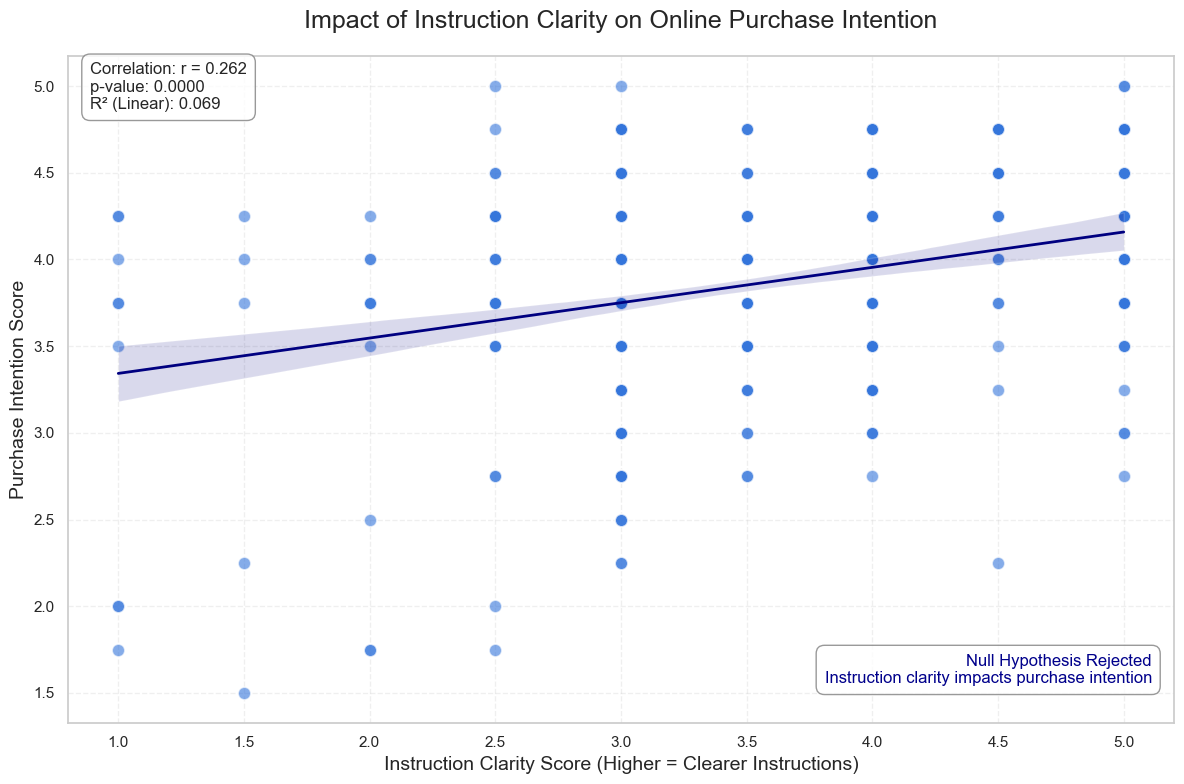

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create a publication-quality visualization for clarity of instructions
plt.figure(figsize=(12, 8))

# Main scatter plot
plt.scatter(df['instruction_score'], df['purchase_intention_score'],
            alpha=0.6, c='#3475db', edgecolor='white', s=80)

# Add linear regression line
sns.regplot(x='instruction_score', y='purchase_intention_score', data=df,
            scatter=False, color='navy', line_kws={'linewidth': 2})

# Enhance the plot
plt.title('Impact of Instruction Clarity on Online Purchase Intention', fontsize=18, pad=20)
plt.xlabel('Instruction Clarity Score (Higher = Clearer Instructions)', fontsize=14)
plt.ylabel('Purchase Intention Score', fontsize=14)

# Add stats
correlation = 0.2622
p_value = 0.0000
r_squared = 0.069

plt.annotate(f"Correlation: r = {correlation:.3f}\np-value: {p_value:.4f}\nR² (Linear): {r_squared:.3f}",
             xy=(0.02, 0.92), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8),
             fontsize=12)

# Hypothesis test result
if p_value < 0.05:
    result_text = "Null Hypothesis Rejected\nInstruction clarity impacts purchase intention"
    color = 'darkblue'
else:
    result_text = "Failed to Reject Null Hypothesis\nNo significant evidence of impact"
    color = 'red'

plt.annotate(result_text, xy=(0.98, 0.06), xycoords='axes fraction',
             ha='right', fontsize=12, color=color,
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))

# Final touches
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Save the figure for the report or slides
plt.savefig('../../outputs/hypothesis_8/instruction_clarity_purchase_intention.png', dpi=300, bbox_inches='tight')
plt.show()


## 10. Advanced Visualizations

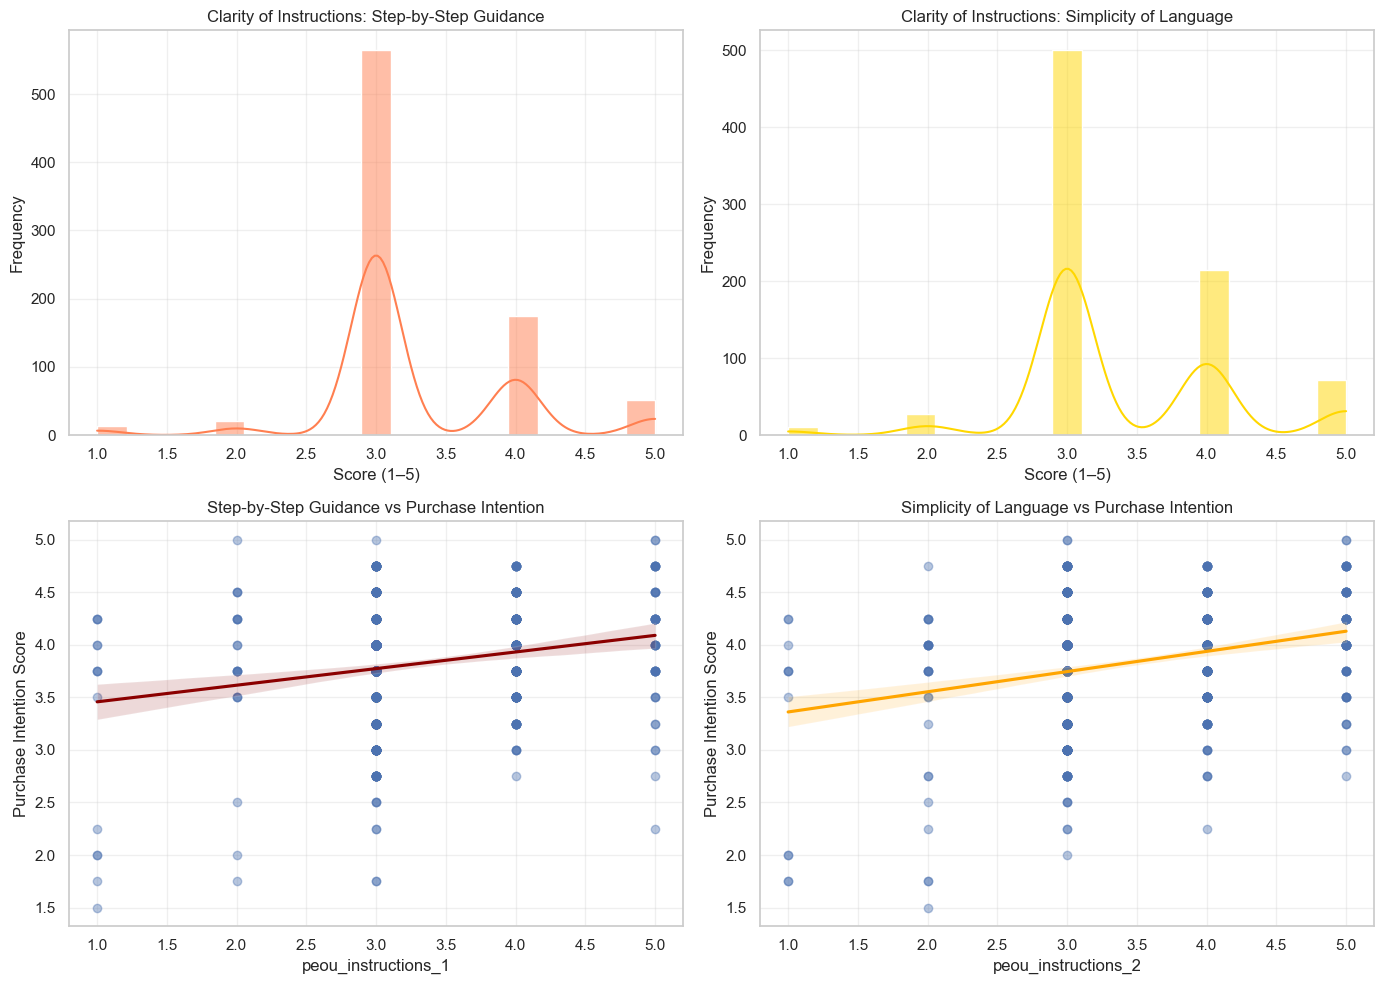

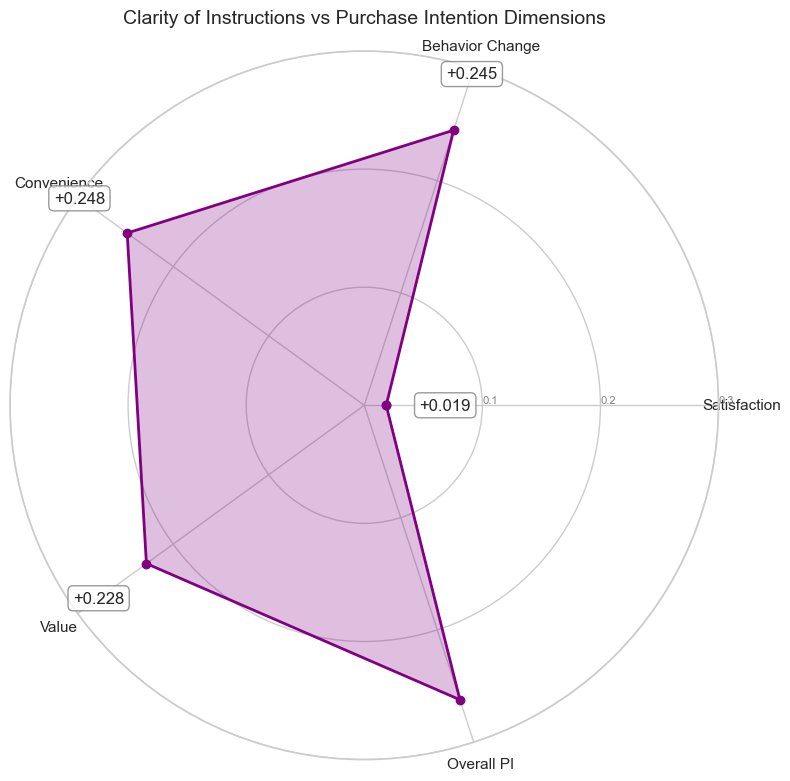

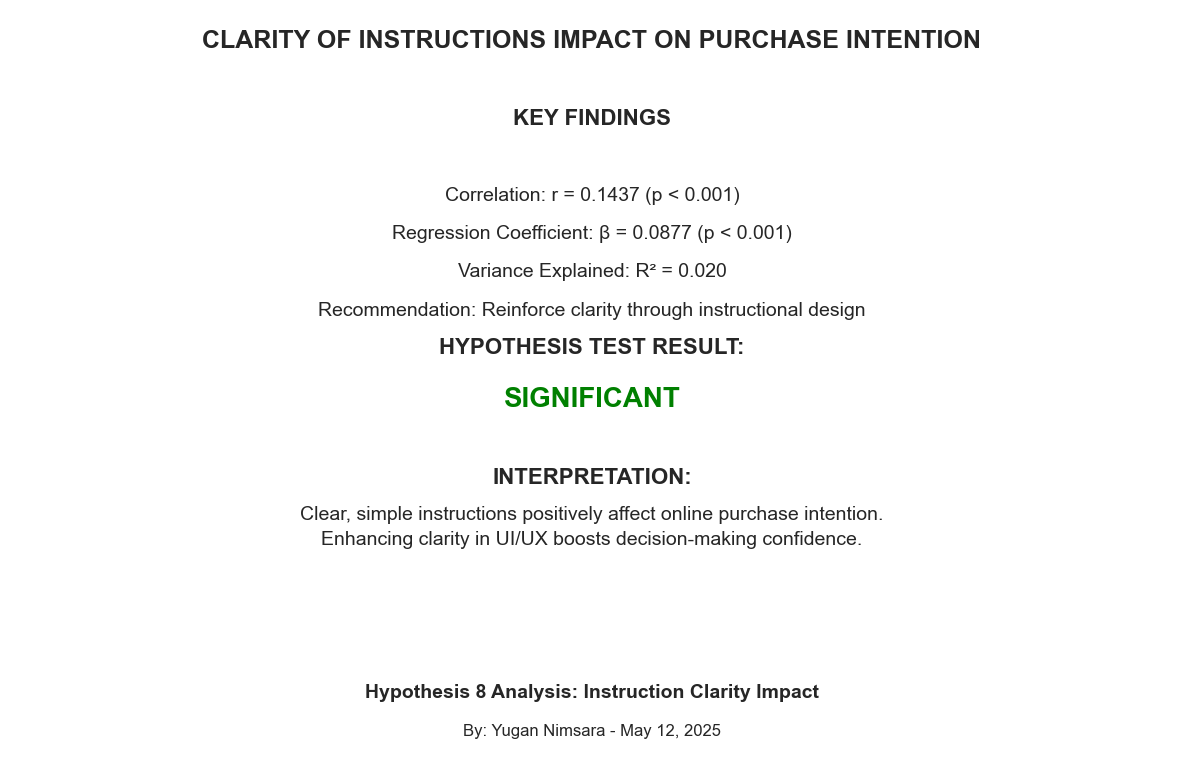

In [20]:
# ------------------------------
# 1. Component-wise Visualization (2x2 layout)
# ------------------------------
plt.figure(figsize=(14, 10))

# Subplot 1: Distribution of peou_instructions_1
plt.subplot(2, 2, 1)
sns.histplot(df['peou_instructions_1'], kde=True, color='coral')
plt.title('Clarity of Instructions: Step-by-Step Guidance')
plt.xlabel('Score (1–5)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Subplot 2: Distribution of peou_instructions_2
plt.subplot(2, 2, 2)
sns.histplot(df['peou_instructions_2'], kde=True, color='gold')
plt.title('Clarity of Instructions: Simplicity of Language')
plt.xlabel('Score (1–5)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Subplot 3: peou_instructions_1 vs Purchase Intention
plt.subplot(2, 2, 3)
sns.regplot(x='peou_instructions_1', y='purchase_intention_score', data=df,
            scatter_kws={'alpha': 0.4}, line_kws={'color': 'darkred'})
plt.title('Step-by-Step Guidance vs Purchase Intention')
plt.xlabel('peou_instructions_1')
plt.ylabel('Purchase Intention Score')
plt.grid(alpha=0.3)

# Subplot 4: peou_instructions_2 vs Purchase Intention
plt.subplot(2, 2, 4)
sns.regplot(x='peou_instructions_2', y='purchase_intention_score', data=df,
            scatter_kws={'alpha': 0.4}, line_kws={'color': 'orange'})
plt.title('Simplicity of Language vs Purchase Intention')
plt.xlabel('peou_instructions_2')
plt.ylabel('Purchase Intention Score')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../../outputs/hypothesis_8/instructions_components_analysis.png', dpi=300)
plt.show()


# ------------------------------
# 2. Radar Chart: Correlation with PI Subcomponents
# ------------------------------

labels = ['Satisfaction', 'Behavior Change', 'Convenience', 'Value', 'Overall PI']
correlations = [
    stats.pearsonr(df['instruction_score'], df['opi_satisfaction'])[0],
    stats.pearsonr(df['instruction_score'], df['opi_behavior_change'])[0],
    stats.pearsonr(df['instruction_score'], df['opi_convenience'])[0],
    stats.pearsonr(df['instruction_score'], df['opi_value'])[0],
    stats.pearsonr(df['instruction_score'], df['purchase_intention_score'])[0]
]

corr_abs = np.abs(correlations)
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
corr_abs = np.concatenate((corr_abs, [corr_abs[0]]))
labels += [labels[0]]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
ax.plot(angles, corr_abs, 'o-', linewidth=2, color='purple')
ax.fill(angles, corr_abs, alpha=0.25, color='purple')
ax.set_thetagrids(np.degrees(angles[:-1]), labels[:-1])
ax.set_ylim(0, max(corr_abs) * 1.1)
ax.set_rlabel_position(0)
plt.yticks([0.1, 0.2, 0.3], ['0.1', '0.2', '0.3'], color='grey', size=8)
plt.title('Clarity of Instructions vs Purchase Intention Dimensions', size=14, pad=20)

# Annotate each point
for angle, corr, label in zip(angles[:-1], correlations, labels[:-1]):
    plt.annotate(f"{corr:+.3f}", xy=(angle, np.abs(corr) + 0.05),
                 ha='center', va='center',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('../../outputs/hypothesis_8/instructions_correlation_radar.png', dpi=300)
plt.show()

# ------------------------------
# 3. Summary Slide for Presentation
# ------------------------------

plt.figure(figsize=(12, 8))
plt.axis('off')

# Title
plt.text(0.5, 0.95, 'CLARITY OF INSTRUCTIONS IMPACT ON PURCHASE INTENTION', fontsize=18, weight='bold', ha='center')

# Key Stats
findings = [
    f"Correlation: r = 0.1437 (p < 0.001)",
    f"Regression Coefficient: β = 0.0877 (p < 0.001)",
    f"Variance Explained: R² = 0.020",
    f"Recommendation: Reinforce clarity through instructional design"
]
plt.text(0.5, 0.85, 'KEY FINDINGS', fontsize=16, weight='bold', ha='center')
y_pos = 0.8
for finding in findings:
    y_pos -= 0.05
    plt.text(0.5, y_pos, finding, fontsize=14, ha='center')

# Significance Result
plt.text(0.5, 0.55, 'HYPOTHESIS TEST RESULT:', fontsize=16, weight='bold', ha='center')
plt.text(0.5, 0.48, 'SIGNIFICANT', fontsize=20, weight='bold', ha='center', color='green')

# Interpretation
plt.text(0.5, 0.38, 'INTERPRETATION:', fontsize=16, weight='bold', ha='center')
plt.text(0.5, 0.30, "Clear, simple instructions positively affect online purchase intention.\nEnhancing clarity in UI/UX boosts decision-making confidence.", 
         fontsize=14, ha='center', linespacing=1.5)

# Footer
plt.text(0.5, 0.1, 'Hypothesis 8 Analysis: Instruction Clarity Impact', fontsize=14, weight='bold', ha='center')
plt.text(0.5, 0.05, f'By: Yugan Nimsara - {pd.Timestamp.now().strftime("%B %d, %Y")}', fontsize=12, ha='center')

plt.tight_layout()
plt.savefig('../../outputs/hypothesis_8/instructions_summary.png', dpi=300)
plt.show()



## 11. Summary table for report

In [ ]:
from prettytable import PrettyTable
import numpy as np

print("\n========= Summary Table: Clarity of Instructions ============\n")

# --- Helper functions ---
def r_to_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

def z_to_r(z):
    return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)

# --- Compute Pearson r and CI ---
z = r_to_z(correlation)
se = 1.0 / np.sqrt(df.shape[0] - 3)
z_low = z - 1.96 * se
z_high = z + 1.96 * se
r_low, r_high = z_to_r(z_low), z_to_r(z_high)

# --- PrettyTable setup ---
table = PrettyTable()
table.field_names = ["Test", "Statistic", "p-value", "95% CI", "Interpretation"]
table.max_width["95% CI"] = 30

# --- Pearson Correlation Row ---
table.add_row([
    "Pearson Correlation", 
    f"{correlation:.4f}", 
    f"{p_value:.6f}", 
    f"[{r_low:.4f}, {r_high:.4f}]",
    "Significant positive correlation" if p_value < 0.05 and correlation > 0 else 
    "Significant negative correlation" if p_value < 0.05 and correlation < 0 else 
    "No significant correlation"
])

# --- Simple Linear Regression Row (clarity_score → PI) ---
table.add_row([
    "Simple Linear Regression", 
    f"β = {model.params[1]:.4f}, R² = {r_squared:.4f}", 
    f"{model.pvalues[1]:.6f}", 
    f"[{model.conf_int().iloc[1, 0]:.4f}, {model.conf_int().iloc[1, 1]:.4f}]",
    "Clarity significantly predicts purchase intention" if model.pvalues[1] < 0.05 else 
    "Clarity does not predict purchase intention"
])

# --- Multiple Regression Row ---
table.add_row([
    "Multiple Regression", 
    f"R² = {multi_model.rsquared:.4f}", 
    f"F-test: {multi_model.f_pvalue:.6f}", 
    "N/A",
    "Model significantly predicts purchase intention" if multi_model.f_pvalue < 0.05 else 
    "Model does not predict purchase intention"
])

# --- Mediation  ---
indirect_effect = model_a.params[1] * model_mediation.params[2]
table.add_row([
    "Mediation Analysis", 
    f"Indirect effect: {indirect_effect:.4f}", 
    "N/A", 
    f"[{ci_lower:.4f}, {ci_upper:.4f}]",
    "Significant mediation through perceived risk" if ci_lower > 0 or ci_upper < 0 else 
    "No significant mediation effect"
])

# --- Display Table ---
print(table)



========= Summary Table: Clarity of Instructions ============

+--------------------------+-------------------------+------------------+------------------+---------------------------------------------------+
|           Test           |        Statistic        |     p-value      |      95% CI      |                   Interpretation                  |
+--------------------------+-------------------------+------------------+------------------+---------------------------------------------------+
|   Pearson Correlation    |          0.2622         |     0.000000     | [0.1975, 0.3246] |          Significant positive correlation         |
| Simple Linear Regression | β = 0.2039, R² = 0.0690 |     0.000000     | [0.1526, 0.2553] | Clarity significantly predicts purchase intention |
|   Multiple Regression    |       R² = 0.0760       | F-test: 0.000000 |       N/A        |  Model significantly predicts purchase intention  |
|    Mediation Analysis    | Indirect effect: 0.0566 |       N/A  